<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/01Interpolacion_coefs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
from scipy.interpolate import CubicSpline,lagrange
import matplotlib.pyplot as plt

In [41]:
x = np.linspace(-2, 2, 11)
y_or = x**3+2*x**2+x+1
perturbacion = np.random.normal(0, 1, len(x))  # Perturbación aleatoria (mean,std,size)
y = y_or + perturbacion

In [42]:
lag = lagrange(x, y)
xi = 1.8
yi = lag(xi)
print(lag)
print(lag.c)

        10          9         8         7         6         5         4
0.3291 x  - 0.9044 x - 3.025 x + 7.293 x + 9.571 x - 18.55 x - 12.56 x
          3         2
 + 16.83 x + 8.855 x - 1.553 x + 0.04048
[  0.32914547  -0.90439511  -3.02511942   7.29316521   9.57086767
 -18.55116781 -12.56359173  16.83255503   8.85474465  -1.55296467
   0.04047709]


In [43]:
sc = CubicSpline(x, y)
yi = sc(xi)
print(sc.c.T)

[[-11.88521668  13.43014829  -2.36207835   1.1999192 ]
 [-11.88521668  -0.83211173   2.67713627   1.64325772]
 [ 30.70676972 -15.09437175  -3.69345712   1.82032048]
 [-32.29332668  21.75375191  -1.02970506  -0.10692858]
 [ 23.69029447 -16.99824011   0.87249967   0.89501679]
 [  1.92677321  11.43011326  -1.35475107   0.04047709]
 [-28.62138533  13.74224111   8.71419067   1.45070827]
 [ 38.77837672 -20.60342128   5.96971861   5.30337445]
 [-23.37638911  25.93063078   8.10060241   6.8765306 ]
 [-23.37638911  -2.12103615  17.62444026  12.76958358]]


In [44]:
# Coeficientes de los polinomios por intervalo
coefs = sc.c  # Matriz con [d_i, c_i, b_i, a_i] por intervalo

# Mostrar coeficientes
for i in range(len(x) - 1):
    print(f"Intervalo [{x[i]}, {x[i+1]}]:")
    #El coeficiente 𝑎 es el valor de 𝑦 en el nodo izquierdo del intervalo.
    #Los coeficientes 𝑏,𝑐,𝑑 se calculan para garantizar la suavidad en las derivadas y la continuidad en los intervalos.
    d = coefs[0, i]
    c = coefs[1, i]
    b = coefs[2, i]
    a = coefs[3, i]
    print(f'y = {a:e} + {b:e}*(x-{x[i]}) + {c:e}*(x-{x[i]})**2 + {d:e}*(x-{x[i]})**3')
    if x[i]<=xi<=x[i+1]:
      yii = a + b*(xi-x[i]) + c*(xi-x[i])**2 + d*(xi-x[i])**3
      print(f"xi = {xi},    yii = {yii} [{yi}]")

Intervalo [-2.0, -1.6]:
y = 1.199919e+00 + -2.362078e+00*(x--2.0) + 1.343015e+01*(x--2.0)**2 + -1.188522e+01*(x--2.0)**3
Intervalo [-1.6, -1.2]:
y = 1.643258e+00 + 2.677136e+00*(x--1.6) + -8.321117e-01*(x--1.6)**2 + -1.188522e+01*(x--1.6)**3
Intervalo [-1.2, -0.7999999999999998]:
y = 1.820320e+00 + -3.693457e+00*(x--1.2) + -1.509437e+01*(x--1.2)**2 + 3.070677e+01*(x--1.2)**3
Intervalo [-0.7999999999999998, -0.3999999999999999]:
y = -1.069286e-01 + -1.029705e+00*(x--0.7999999999999998) + 2.175375e+01*(x--0.7999999999999998)**2 + -3.229333e+01*(x--0.7999999999999998)**3
Intervalo [-0.3999999999999999, 0.0]:
y = 8.950168e-01 + 8.724997e-01*(x--0.3999999999999999) + -1.699824e+01*(x--0.3999999999999999)**2 + 2.369029e+01*(x--0.3999999999999999)**3
Intervalo [0.0, 0.40000000000000036]:
y = 4.047709e-02 + -1.354751e+00*(x-0.0) + 1.143011e+01*(x-0.0)**2 + 1.926773e+00*(x-0.0)**3
Intervalo [0.40000000000000036, 0.8000000000000003]:
y = 1.450708e+00 + 8.714191e+00*(x-0.40000000000000036) + 1.37

In [57]:
from scipy.interpolate import UnivariateSpline
uvs = UnivariateSpline(x, y, k=3,s=50) #k grado del spline, s factor smooting
xi = 1.8
yi = uvs(xi)
print(yi)

15.025214548452361


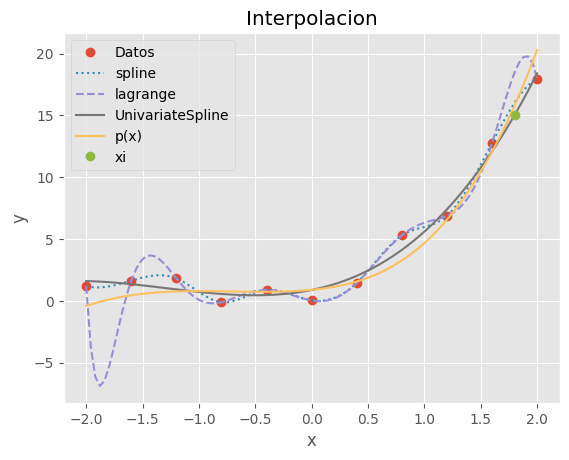

In [58]:
xs = np.linspace(x.min(),x.max(),100)
plt.style.use('ggplot')#('seaborn-v0_8-dark-palette')
plt.plot(x, y, 'o',label='Datos')
plt.plot(xs, sc(xs), ':',label='spline')
plt.plot(xs, lag(xs), '--',label='lagrange')
plt.plot(xs, uvs(xs), '-',label='UnivariateSpline')
plt.plot(xs, p(xs), '-',label='p(x)')
plt.plot(xi, yi, 'o',label='xi')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolacion')
#plt.grid()
plt.show()